In [13]:
import torch
import torch.nn as nn
import torch.optim as opt
import torch.autograd as auto
from torch.utils.data import TensorDataset,DataLoader
import matplotlib.pyplot as plt
# import torch.autograd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
import librosa
import matplotlib.pyplot as plt

In [2]:
data=joblib.load('mfcc.sav')
len(data)

X,y=[],[]
for i in data:
    X.append(librosa.util.pad_center(i[0], 173, axis=1))
    y.append(i[1])

y_dictionary={'air_conditioner':0,
              'car_horn':1,
              'children_playing':2,
              'dog_bark':3,
              'drilling':4,
              'engine_idling':5,
              'gun_shot':6,
              'jackhammer':7,
              'siren':8,
              'street_music':9}

for i in range(0,len(y)):
    print(y[i],'-->',y_dictionary.get(y[i]),'==>',end='')
    y[i]=y_dictionary.get(y[i])
    print(y[i])

siren --> 8 ==>8
street_music --> 9 ==>9
drilling --> 4 ==>4
siren --> 8 ==>8
dog_bark --> 3 ==>3
children_playing --> 2 ==>2
street_music --> 9 ==>9
drilling --> 4 ==>4
gun_shot --> 6 ==>6
dog_bark --> 3 ==>3
engine_idling --> 5 ==>5
siren --> 8 ==>8
gun_shot --> 6 ==>6
engine_idling --> 5 ==>5
air_conditioner --> 0 ==>0
air_conditioner --> 0 ==>0
engine_idling --> 5 ==>5
siren --> 8 ==>8
children_playing --> 2 ==>2
jackhammer --> 7 ==>7
gun_shot --> 6 ==>6
siren --> 8 ==>8
jackhammer --> 7 ==>7
street_music --> 9 ==>9
jackhammer --> 7 ==>7
engine_idling --> 5 ==>5
siren --> 8 ==>8
children_playing --> 2 ==>2
jackhammer --> 7 ==>7
engine_idling --> 5 ==>5
air_conditioner --> 0 ==>0
car_horn --> 1 ==>1
drilling --> 4 ==>4
siren --> 8 ==>8
gun_shot --> 6 ==>6
children_playing --> 2 ==>2
children_playing --> 2 ==>2
drilling --> 4 ==>4
gun_shot --> 6 ==>6
siren --> 8 ==>8
car_horn --> 1 ==>1
drilling --> 4 ==>4
street_music --> 9 ==>9
jackhammer --> 7 ==>7
children_playing --> 2 ==>2
dog_

street_music --> 9 ==>9
dog_bark --> 3 ==>3
gun_shot --> 6 ==>6
children_playing --> 2 ==>2
children_playing --> 2 ==>2
children_playing --> 2 ==>2
drilling --> 4 ==>4
drilling --> 4 ==>4
siren --> 8 ==>8
jackhammer --> 7 ==>7
children_playing --> 2 ==>2
street_music --> 9 ==>9
children_playing --> 2 ==>2
street_music --> 9 ==>9
dog_bark --> 3 ==>3
engine_idling --> 5 ==>5
dog_bark --> 3 ==>3
siren --> 8 ==>8
dog_bark --> 3 ==>3
engine_idling --> 5 ==>5
engine_idling --> 5 ==>5
drilling --> 4 ==>4
children_playing --> 2 ==>2
drilling --> 4 ==>4
street_music --> 9 ==>9
siren --> 8 ==>8
car_horn --> 1 ==>1
street_music --> 9 ==>9
street_music --> 9 ==>9
siren --> 8 ==>8
car_horn --> 1 ==>1
siren --> 8 ==>8
jackhammer --> 7 ==>7
children_playing --> 2 ==>2
air_conditioner --> 0 ==>0
dog_bark --> 3 ==>3
air_conditioner --> 0 ==>0
drilling --> 4 ==>4
engine_idling --> 5 ==>5
children_playing --> 2 ==>2
siren --> 8 ==>8
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
engine_idling --> 5 ==>

street_music --> 9 ==>9
air_conditioner --> 0 ==>0
drilling --> 4 ==>4
children_playing --> 2 ==>2
dog_bark --> 3 ==>3
air_conditioner --> 0 ==>0
siren --> 8 ==>8
street_music --> 9 ==>9
jackhammer --> 7 ==>7
engine_idling --> 5 ==>5
children_playing --> 2 ==>2
engine_idling --> 5 ==>5
gun_shot --> 6 ==>6
children_playing --> 2 ==>2
children_playing --> 2 ==>2
air_conditioner --> 0 ==>0
jackhammer --> 7 ==>7
dog_bark --> 3 ==>3
children_playing --> 2 ==>2
air_conditioner --> 0 ==>0
siren --> 8 ==>8
siren --> 8 ==>8
siren --> 8 ==>8
street_music --> 9 ==>9
children_playing --> 2 ==>2
drilling --> 4 ==>4
street_music --> 9 ==>9
drilling --> 4 ==>4
car_horn --> 1 ==>1
siren --> 8 ==>8
jackhammer --> 7 ==>7
street_music --> 9 ==>9
engine_idling --> 5 ==>5
children_playing --> 2 ==>2
engine_idling --> 5 ==>5
gun_shot --> 6 ==>6
street_music --> 9 ==>9
jackhammer --> 7 ==>7
jackhammer --> 7 ==>7
dog_bark --> 3 ==>3
jackhammer --> 7 ==>7
drilling --> 4 ==>4
jackhammer --> 7 ==>7
air_condition

air_conditioner --> 0 ==>0
siren --> 8 ==>8
drilling --> 4 ==>4
engine_idling --> 5 ==>5
street_music --> 9 ==>9
drilling --> 4 ==>4
air_conditioner --> 0 ==>0
siren --> 8 ==>8
jackhammer --> 7 ==>7
jackhammer --> 7 ==>7
engine_idling --> 5 ==>5
car_horn --> 1 ==>1
air_conditioner --> 0 ==>0
air_conditioner --> 0 ==>0
jackhammer --> 7 ==>7
siren --> 8 ==>8
engine_idling --> 5 ==>5
siren --> 8 ==>8
car_horn --> 1 ==>1
car_horn --> 1 ==>1
children_playing --> 2 ==>2
engine_idling --> 5 ==>5
air_conditioner --> 0 ==>0
engine_idling --> 5 ==>5
drilling --> 4 ==>4
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
children_playing --> 2 ==>2
drilling --> 4 ==>4
dog_bark --> 3 ==>3
jackhammer --> 7 ==>7
jackhammer --> 7 ==>7
car_horn --> 1 ==>1
siren --> 8 ==>8
dog_bark --> 3 ==>3
siren --> 8 ==>8
gun_shot --> 6 ==>6
engine_idling --> 5 ==>5
children_playing --> 2 ==>2
air_conditioner --> 0 ==>0
street_music --> 9 ==>9
gun_shot --> 6 ==>6
children_playing --> 2 ==>2
engine_idling --> 5 ==>5
engine_idli

car_horn --> 1 ==>1
dog_bark --> 3 ==>3
street_music --> 9 ==>9
dog_bark --> 3 ==>3
drilling --> 4 ==>4
drilling --> 4 ==>4
drilling --> 4 ==>4
dog_bark --> 3 ==>3
engine_idling --> 5 ==>5
gun_shot --> 6 ==>6
engine_idling --> 5 ==>5
siren --> 8 ==>8
children_playing --> 2 ==>2
engine_idling --> 5 ==>5
jackhammer --> 7 ==>7
children_playing --> 2 ==>2
car_horn --> 1 ==>1
jackhammer --> 7 ==>7
engine_idling --> 5 ==>5
gun_shot --> 6 ==>6
dog_bark --> 3 ==>3
drilling --> 4 ==>4
street_music --> 9 ==>9
air_conditioner --> 0 ==>0
jackhammer --> 7 ==>7
gun_shot --> 6 ==>6
jackhammer --> 7 ==>7
siren --> 8 ==>8
street_music --> 9 ==>9
engine_idling --> 5 ==>5
siren --> 8 ==>8
children_playing --> 2 ==>2
street_music --> 9 ==>9
car_horn --> 1 ==>1
street_music --> 9 ==>9
children_playing --> 2 ==>2
car_horn --> 1 ==>1
street_music --> 9 ==>9
dog_bark --> 3 ==>3
car_horn --> 1 ==>1
children_playing --> 2 ==>2
jackhammer --> 7 ==>7
siren --> 8 ==>8
siren --> 8 ==>8
jackhammer --> 7 ==>7
dog_bar

air_conditioner --> 0 ==>0
jackhammer --> 7 ==>7
siren --> 8 ==>8
drilling --> 4 ==>4
siren --> 8 ==>8
street_music --> 9 ==>9
jackhammer --> 7 ==>7
jackhammer --> 7 ==>7
car_horn --> 1 ==>1
car_horn --> 1 ==>1
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
jackhammer --> 7 ==>7
drilling --> 4 ==>4
air_conditioner --> 0 ==>0
street_music --> 9 ==>9
children_playing --> 2 ==>2
gun_shot --> 6 ==>6
air_conditioner --> 0 ==>0
siren --> 8 ==>8
car_horn --> 1 ==>1
jackhammer --> 7 ==>7
children_playing --> 2 ==>2
street_music --> 9 ==>9
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
children_playing --> 2 ==>2
street_music --> 9 ==>9
gun_shot --> 6 ==>6
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
street_music --> 9 ==>9
dog_bark --> 3 ==>3
drilling --> 4 ==>4
drilling --> 4 ==>4
drilling --> 4 ==>4
air_conditioner --> 0 ==>0
engine_idling --> 5 ==>5
street_music --> 9 ==>9
gun_shot --> 6 ==>6
siren --> 8 ==>8
car_horn --> 1 ==>1
engine_idlin

siren --> 8 ==>8
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
dog_bark --> 3 ==>3
children_playing --> 2 ==>2
street_music --> 9 ==>9
drilling --> 4 ==>4
air_conditioner --> 0 ==>0
children_playing --> 2 ==>2
jackhammer --> 7 ==>7
siren --> 8 ==>8
engine_idling --> 5 ==>5
engine_idling --> 5 ==>5
children_playing --> 2 ==>2
siren --> 8 ==>8
drilling --> 4 ==>4
dog_bark --> 3 ==>3
engine_idling --> 5 ==>5
children_playing --> 2 ==>2
air_conditioner --> 0 ==>0
street_music --> 9 ==>9
air_conditioner --> 0 ==>0
air_conditioner --> 0 ==>0
air_conditioner --> 0 ==>0
siren --> 8 ==>8
siren --> 8 ==>8
dog_bark --> 3 ==>3
children_playing --> 2 ==>2
siren --> 8 ==>8
siren --> 8 ==>8
jackhammer --> 7 ==>7
siren --> 8 ==>8
car_horn --> 1 ==>1
street_music --> 9 ==>9
drilling --> 4 ==>4
engine_idling --> 5 ==>5
dog_bark --> 3 ==>3
street_music --> 9 ==>9
engine_idling --> 5 ==>5
dog_bark --> 3 ==>3
gun_shot --> 6 ==>6
car_horn --> 1 ==>1
siren --> 8 ==>8
street_music --> 9 ==>9
children_playi

children_playing --> 2 ==>2
engine_idling --> 5 ==>5
engine_idling --> 5 ==>5
street_music --> 9 ==>9
jackhammer --> 7 ==>7
dog_bark --> 3 ==>3
car_horn --> 1 ==>1
engine_idling --> 5 ==>5
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
street_music --> 9 ==>9
street_music --> 9 ==>9
dog_bark --> 3 ==>3
children_playing --> 2 ==>2
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
drilling --> 4 ==>4
jackhammer --> 7 ==>7
dog_bark --> 3 ==>3
siren --> 8 ==>8
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
engine_idling --> 5 ==>5
dog_bark --> 3 ==>3
engine_idling --> 5 ==>5
drilling --> 4 ==>4
street_music --> 9 ==>9
jackhammer --> 7 ==>7
street_music --> 9 ==>9
drilling --> 4 ==>4
car_horn --> 1 ==>1
dog_bark --> 3 ==>3
jackhammer --> 7 ==>7
siren --> 8 ==>8
dog_bark --> 3 ==>3
engine_idling --> 5 ==>5
dog_bark --> 3 ==>3
gun_shot --> 6 ==>6
engine_idling --> 5 ==>5
car_horn --> 1 ==>1
street_music --> 9 ==>9
engine_idling --> 5 ==>5
street_music --> 9 ==>9
engine_idling --> 5 ==>5
dr

children_playing --> 2 ==>2
dog_bark --> 3 ==>3
car_horn --> 1 ==>1
gun_shot --> 6 ==>6
siren --> 8 ==>8
engine_idling --> 5 ==>5
jackhammer --> 7 ==>7
street_music --> 9 ==>9
street_music --> 9 ==>9
siren --> 8 ==>8
gun_shot --> 6 ==>6
air_conditioner --> 0 ==>0
children_playing --> 2 ==>2
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
street_music --> 9 ==>9
air_conditioner --> 0 ==>0
engine_idling --> 5 ==>5
jackhammer --> 7 ==>7
street_music --> 9 ==>9
car_horn --> 1 ==>1
air_conditioner --> 0 ==>0
drilling --> 4 ==>4
air_conditioner --> 0 ==>0
dog_bark --> 3 ==>3
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
siren --> 8 ==>8
gun_shot --> 6 ==>6
jackhammer --> 7 ==>7
drilling --> 4 ==>4
jackhammer --> 7 ==>7
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
street_music --> 9 ==>9
drilling --> 4 ==>4
car_horn --> 1 ==>1
car_horn --> 1 ==>1
jackhammer --> 7 ==>7
dog_bark --> 3 ==>3
gun_shot --> 6 ==>6
siren --> 8 ==>8
drilling --> 4 ==>4
engine_idling --> 5

street_music --> 9 ==>9
air_conditioner --> 0 ==>0
jackhammer --> 7 ==>7
dog_bark --> 3 ==>3
children_playing --> 2 ==>2
drilling --> 4 ==>4
engine_idling --> 5 ==>5
dog_bark --> 3 ==>3
drilling --> 4 ==>4
dog_bark --> 3 ==>3
jackhammer --> 7 ==>7
gun_shot --> 6 ==>6
dog_bark --> 3 ==>3
children_playing --> 2 ==>2
drilling --> 4 ==>4
street_music --> 9 ==>9
jackhammer --> 7 ==>7
dog_bark --> 3 ==>3
siren --> 8 ==>8
engine_idling --> 5 ==>5
jackhammer --> 7 ==>7
drilling --> 4 ==>4
air_conditioner --> 0 ==>0
gun_shot --> 6 ==>6
street_music --> 9 ==>9
drilling --> 4 ==>4
engine_idling --> 5 ==>5
siren --> 8 ==>8
street_music --> 9 ==>9
engine_idling --> 5 ==>5
engine_idling --> 5 ==>5
jackhammer --> 7 ==>7
jackhammer --> 7 ==>7
siren --> 8 ==>8
street_music --> 9 ==>9
gun_shot --> 6 ==>6
gun_shot --> 6 ==>6
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
siren --> 8 ==>8
children_playing --> 2 ==>2
jackhammer --> 7 ==>7
drilling --> 4 ==>4
dog_bark --> 3 ==>3
jackhammer --> 7 ==>7
car_

drilling --> 4 ==>4
air_conditioner --> 0 ==>0
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
children_playing --> 2 ==>2
jackhammer --> 7 ==>7
jackhammer --> 7 ==>7
gun_shot --> 6 ==>6
siren --> 8 ==>8
siren --> 8 ==>8
jackhammer --> 7 ==>7
dog_bark --> 3 ==>3
jackhammer --> 7 ==>7
siren --> 8 ==>8
engine_idling --> 5 ==>5
air_conditioner --> 0 ==>0
engine_idling --> 5 ==>5
children_playing --> 2 ==>2
street_music --> 9 ==>9
engine_idling --> 5 ==>5
drilling --> 4 ==>4
siren --> 8 ==>8
siren --> 8 ==>8
siren --> 8 ==>8
jackhammer --> 7 ==>7
jackhammer --> 7 ==>7
street_music --> 9 ==>9
air_conditioner --> 0 ==>0
dog_bark --> 3 ==>3
street_music --> 9 ==>9
siren --> 8 ==>8
gun_shot --> 6 ==>6
jackhammer --> 7 ==>7
jackhammer --> 7 ==>7
siren --> 8 ==>8
air_conditioner --> 0 ==>0
drilling --> 4 ==>4
dog_bark --> 3 ==>3
drilling --> 4 ==>4
car_horn --> 1 ==>1
engine_idling --> 5 ==>5
car_horn --> 1 ==>1
street_music --> 9 ==>9
dog_bark --> 3 ==>3
children_playing --> 2 ==>2
air_conditi

children_playing --> 2 ==>2
air_conditioner --> 0 ==>0
street_music --> 9 ==>9
jackhammer --> 7 ==>7
jackhammer --> 7 ==>7
street_music --> 9 ==>9
car_horn --> 1 ==>1
jackhammer --> 7 ==>7
drilling --> 4 ==>4
engine_idling --> 5 ==>5
drilling --> 4 ==>4
drilling --> 4 ==>4
children_playing --> 2 ==>2
drilling --> 4 ==>4
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
air_conditioner --> 0 ==>0
siren --> 8 ==>8
siren --> 8 ==>8
drilling --> 4 ==>4
dog_bark --> 3 ==>3
car_horn --> 1 ==>1
engine_idling --> 5 ==>5
engine_idling --> 5 ==>5
car_horn --> 1 ==>1
engine_idling --> 5 ==>5
dog_bark --> 3 ==>3
street_music --> 9 ==>9
street_music --> 9 ==>9
jackhammer --> 7 ==>7
siren --> 8 ==>8
street_music --> 9 ==>9
jackhammer --> 7 ==>7
car_horn --> 1 ==>1
siren --> 8 ==>8
engine_idling --> 5 ==>5
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
engine_idling --> 5 ==>5
air_conditioner --> 0 ==>0
gun_shot --> 6 ==>6
children_playing --> 2 ==>2
children_playing --> 2 ==>2
children_playing --> 2 ==>2
air_conditi

air_conditioner --> 0 ==>0
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
siren --> 8 ==>8
street_music --> 9 ==>9
air_conditioner --> 0 ==>0
street_music --> 9 ==>9
siren --> 8 ==>8
car_horn --> 1 ==>1
engine_idling --> 5 ==>5
car_horn --> 1 ==>1
car_horn --> 1 ==>1
street_music --> 9 ==>9
street_music --> 9 ==>9
drilling --> 4 ==>4
jackhammer --> 7 ==>7
children_playing --> 2 ==>2
children_playing --> 2 ==>2
air_conditioner --> 0 ==>0
dog_bark --> 3 ==>3
dog_bark --> 3 ==>3
street_music --> 9 ==>9
air_conditioner --> 0 ==>0
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
street_music --> 9 ==>9
air_conditioner --> 0 ==>0
car_horn --> 1 ==>1
engine_idling --> 5 ==>5
engine_idling --> 5 ==>5
engine_idling --> 5 ==>5
children_playing --> 2 ==>2
dog_bark --> 3 ==>3
street_music --> 9 ==>9
drilling --> 4 ==>4
children_playing --> 2 ==>2
engine_idling --> 5 ==>5
air_conditioner --> 0 ==>0
gun_shot --> 6 ==>6
engine_idling --> 5 ==>5
gun_shot --> 6 ==>6
air_conditioner --> 0 ==>0
street_

siren --> 8 ==>8
dog_bark --> 3 ==>3
siren --> 8 ==>8
jackhammer --> 7 ==>7
air_conditioner --> 0 ==>0
drilling --> 4 ==>4
engine_idling --> 5 ==>5
jackhammer --> 7 ==>7
car_horn --> 1 ==>1
street_music --> 9 ==>9
drilling --> 4 ==>4
street_music --> 9 ==>9
street_music --> 9 ==>9
car_horn --> 1 ==>1
street_music --> 9 ==>9
air_conditioner --> 0 ==>0
street_music --> 9 ==>9
air_conditioner --> 0 ==>0
gun_shot --> 6 ==>6
siren --> 8 ==>8
jackhammer --> 7 ==>7
siren --> 8 ==>8
gun_shot --> 6 ==>6
dog_bark --> 3 ==>3
street_music --> 9 ==>9
dog_bark --> 3 ==>3
jackhammer --> 7 ==>7
dog_bark --> 3 ==>3
engine_idling --> 5 ==>5
siren --> 8 ==>8
children_playing --> 2 ==>2
jackhammer --> 7 ==>7
street_music --> 9 ==>9
engine_idling --> 5 ==>5
dog_bark --> 3 ==>3
street_music --> 9 ==>9
children_playing --> 2 ==>2
engine_idling --> 5 ==>5
dog_bark --> 3 ==>3
engine_idling --> 5 ==>5
engine_idling --> 5 ==>5
air_conditioner --> 0 ==>0


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
X_train[2].shape

(40, 173)

In [14]:
BATCH_SIZE = 64


In [15]:
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)
y_train=torch.Tensor(y_train)
y_test=torch.Tensor(y_test)

In [16]:
train_ds = TensorDataset(X_train, y_train)
train_dl = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True)

# test_ds = TensorDataset(X_test, y_test)
# test_dl = DataLoader(valid_ds, batch_size=BATCH_SIZE * 2)

In [17]:
# parameters 
N_STEPS = 40
N_INPUTS = 173
N_NEURONS = 173
N_OUTPUTS = 10
N_EPHOCS = 10

In [18]:
class ImageRNN(nn.Module):
    def __init__(self, batch_size, n_steps, n_inputs, n_neurons, n_outputs):
        super(ImageRNN, self).__init__()
        
        self.n_neurons = n_neurons
        self.batch_size = batch_size
        self.n_steps = n_steps
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        
        print(batch_size, n_steps, n_inputs, n_neurons, n_outputs)
        self.lstm = nn.LSTM(self.n_inputs, self.n_neurons,2)
        
        self.FC = nn.Linear(self.n_neurons, self.n_outputs)
        
    def init_hidden(self,):
        # (num_layers, batch_size, n_neurons)
        return (torch.zeros(1, self.batch_size, self.n_neurons),torch.zeros(1, self.batch_size, self.n_neurons))
        
    def forward(self, X):
        # transforms X to dimensions: n_steps X batch_size X n_inputs
        X = X.permute(1, 0, 2) 
        
        self.batch_size = X.size(1)
        self.hidden = self.init_hidden()
        
#         lstm_out, self.hidden = self.lstm(X, self.hidden)  
        lstm_out, self.hidden = self.lstm(X)  
#         out = self.FC(self.hidden)
        out = self.FC(lstm_out[-1])
        
        return out.view(-1, self.n_outputs) # batch_size X n_output


In [19]:
import torch.optim as optim
import torch.nn.functional as F

# Device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Model instance
model = ImageRNN(BATCH_SIZE, N_STEPS, N_INPUTS, N_NEURONS, N_OUTPUTS)
# criterion = nn.CrossEntropyLoss()
criterion = F.cross_entropy
optimizer = optim.Adam(model.parameters(), lr=5e-3)

def get_accuracy(logit, target, batch_size):
    ''' Obtain accuracy for training round '''
    corrects = (torch.max(logit, 1)[1].view(target.size()).data == target.data).sum()
    accuracy = 100.0 * corrects/batch_size
    return accuracy.item()

64 40 173 173 10


In [20]:
for_plot_loss=[]
for_plot_acc=[]
for epoch in range(N_EPHOCS):  # loop over the dataset multiple times
    train_running_loss = 0.0
    train_acc = 0.0
    model.train()
    
    # TRAINING ROUND
    for i, data in enumerate(train_dl):
         # zero the parameter gradients
        optimizer.zero_grad()
        
        # reset hidden states
        model.hidden = model.init_hidden() 
        
        # get the inputs
        inputs, labels = data
        inputs = inputs.view(-1, 40,173)

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(outputs, labels.long(), BATCH_SIZE)
        
    for_plot_loss.append(train_running_loss/i)
    for_plot_acc.append(train_acc/i)
        
    model.eval()
    print('Epoch:  %d | Loss: %.4f | Train Accuracy: %.2f' 
          %(epoch, train_running_loss / i, train_acc/i))

Epoch:  0 | Loss: 1.8724 | Train Accuracy: 28.61
Epoch:  1 | Loss: 1.4808 | Train Accuracy: 42.69
Epoch:  2 | Loss: 1.2366 | Train Accuracy: 54.28
Epoch:  3 | Loss: 0.9992 | Train Accuracy: 64.01
Epoch:  4 | Loss: 0.8509 | Train Accuracy: 70.09
Epoch:  5 | Loss: 0.7135 | Train Accuracy: 75.06
Epoch:  6 | Loss: 0.5619 | Train Accuracy: 80.70
Epoch:  7 | Loss: 0.4324 | Train Accuracy: 86.33
Epoch:  8 | Loss: 0.3616 | Train Accuracy: 88.45
Epoch:  9 | Loss: 0.2475 | Train Accuracy: 93.03


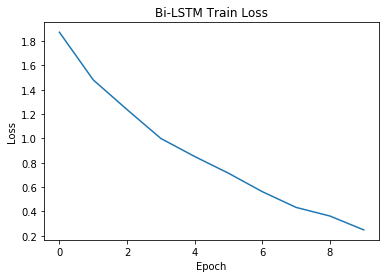

In [23]:
plt.plot(for_plot_loss)
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Bi-LSTM Train Loss")
plt.show()

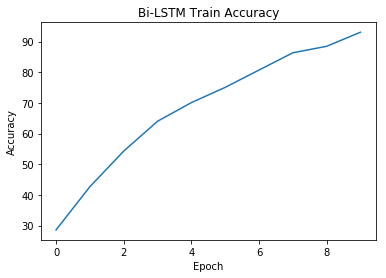

In [24]:
plt.plot(for_plot_acc)
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.title("Bi-LSTM Train Accuracy")
plt.show()